In [309]:
import pandas as pd
from xlwings import view
import numpy as np
import scipy as sc
import seaborn as sns

import matplotlib.pyplot as plt

In [310]:
##. cargar el excel

#from xlwings import load
datos=pd.read_excel("Info RMV data medelado .xlsx")
datos

,Codigo,RH,Nombre y Apellidos,RUC,DNI,Celular,Comprobante,Destino,Distrito,Agencia,...,Co,Asesor,Costos de envios,Marca,Modelo,Cantidad,Equipos,Unnamed: 23,Unnamed: 24,Categoria
0,1,BV,Yamira Santillana,NaN,NaN,912672415,BV EB01-1,Lima,San Felipe,NaN,...,U,Rodrigo,NaN,GOOJPRT,PT-210,1,Impresora termica de 58mm portátil bluetooth,NaN,NaN,Impresoras termicas Portatiles
1,2,FT,Jhonathan Brain Tech,NaN,20608133161,NaN,FT E001-1,Lima,Santa Anita,NaN,...,U,Rodrigo,NaN,GOOJPRT,PT-210,1,Impresora termica de 58mm portátil bluetooth,NaN,NaN,Impresoras termicas Portatiles
2,3,BV,Juan Carlos,NaN,NaN,946289484,BV EB01-2(NOTA DE CREDITO),Lima,La Molina,NaN,...,U,Sergio,NaN,GOOJPRT,PT-210,1,Impresora termica de 58mm portátil bluetooth,NaN,NaN,Impresoras termicas Portatiles
3,4,No va,Jose,NaN,NaN,NaN,-,Lima,Rimac,NaN,...,U,Sergio,NaN,GOOJPRT,PT-210,1,Impresora termica de 58mm portátil bluetooth,NaN,NaN,Impresoras termicas Portatiles
4,5,BV,Carlos Jimenez,NaN,71719102,955181806,BV EB01-3,Lima,Huacho,Shalom,...,M,Sergio,NaN,GOOJPRT,PT-210,3,Impresora termica de 58mm portátil bluetooth,NaN,NaN,Impresoras termicas Portatiles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,969,FT,Erica Gricelda Meca Rios,NaN,47774387,967370828,FT F001-158,Ica,Chincha,Soyuz,...,U,Rodrigo,NaN,GOOJPRT,PT-210,1,Impresora termica de 58mm portátil bluetooth,NaN,NaN,Impresoras termicas Portatiles
968,970,FT,Erica Gricelda Meca Rios,NaN,47774387,967370828,FT F001-158,Ica,Chincha,Soyuz,...,U,Rodrigo,NaN,Generico,58*40mm,10,rollos termicos,NaN,NaN,Rollo de papel termico
969,971,FT,Juan Neil Velasque Bendezú,NaN,70428295,913055496,FT F001-158,Ayacucho,Chincha,Shalom,...,U,Rodrigo,NaN,Xprinter,260M,1,Impresora termica 80mm Escritorio Usb-Bluetooth,NaN,NaN,Impresoras termicas de Escritorio
970,972,FT,Juan Neil Velasque Bendezú,NaN,70428295,913055496,FT F001-158,Ayacucho,Chincha,Shalom,...,U,Rodrigo,NaN,Gallo,80*80mm,20,contometros,NaN,NaN,Rollo de papel termico


In [311]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Codigo              972 non-null    int64         
 1   RH                  969 non-null    object        
 2   Nombre y Apellidos  972 non-null    object        
 3   RUC                 199 non-null    object        
 4   DNI                 938 non-null    object        
 5   Celular             970 non-null    object        
 6   Comprobante         965 non-null    object        
 7   Destino             972 non-null    object        
 8   Distrito            674 non-null    object        
 9   Agencia             954 non-null    object        
 10  Direccion           969 non-null    object        
 11  Forma               972 non-null    object        
 12  Fecha de Compra     972 non-null    datetime64[ns]
 13  Pago                972 non-null    object        

In [312]:
#desconposicion de las fechas del excel info rmv
datos["Año"]=datos["Fecha de Compra"].dt.year
datos["Mes"]=datos["Fecha de Compra"].dt.month
datos["Dia"]=datos["Fecha de Compra"].dt.day
datos

,Codigo,RH,Nombre y Apellidos,RUC,DNI,Celular,Comprobante,Destino,Distrito,Agencia,...,Marca,Modelo,Cantidad,Equipos,Unnamed: 23,Unnamed: 24,Categoria,Año,Mes,Dia
0,1,BV,Yamira Santillana,NaN,NaN,912672415,BV EB01-1,Lima,San Felipe,NaN,...,GOOJPRT,PT-210,1,Impresora termica de 58mm portátil bluetooth,NaN,NaN,Impresoras termicas Portatiles,2022,4,23
1,2,FT,Jhonathan Brain Tech,NaN,20608133161,NaN,FT E001-1,Lima,Santa Anita,NaN,...,GOOJPRT,PT-210,1,Impresora termica de 58mm portátil bluetooth,NaN,NaN,Impresoras termicas Portatiles,2022,4,28
2,3,BV,Juan Carlos,NaN,NaN,946289484,BV EB01-2(NOTA DE CREDITO),Lima,La Molina,NaN,...,GOOJPRT,PT-210,1,Impresora termica de 58mm portátil bluetooth,NaN,NaN,Impresoras termicas Portatiles,2022,5,1
3,4,No va,Jose,NaN,NaN,NaN,-,Lima,Rimac,NaN,...,GOOJPRT,PT-210,1,Impresora termica de 58mm portátil bluetooth,NaN,NaN,Impresoras termicas Portatiles,2022,5,1
4,5,BV,Carlos Jimenez,NaN,71719102,955181806,BV EB01-3,Lima,Huacho,Shalom,...,GOOJPRT,PT-210,3,Impresora termica de 58mm portátil bluetooth,NaN,NaN,Impresoras termicas Portatiles,2022,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,969,FT,Erica Gricelda Meca Rios,NaN,47774387,967370828,FT F001-158,Ica,Chincha,Soyuz,...,GOOJPRT,PT-210,1,Impresora termica de 58mm portátil bluetooth,NaN,NaN,Impresoras termicas Portatiles,2023,5,31
968,970,FT,Erica Gricelda Meca Rios,NaN,47774387,967370828,FT F001-158,Ica,Chincha,Soyuz,...,Generico,58*40mm,10,rollos termicos,NaN,NaN,Rollo de papel termico,2023,5,31
969,971,FT,Juan Neil Velasque Bendezú,NaN,70428295,913055496,FT F001-158,Ayacucho,Chincha,Shalom,...,Xprinter,260M,1,Impresora termica 80mm Escritorio Usb-Bluetooth,NaN,NaN,Impresoras termicas de Escritorio,2023,5,31
970,972,FT,Juan Neil Velasque Bendezú,NaN,70428295,913055496,FT F001-158,Ayacucho,Chincha,Shalom,...,Gallo,80*80mm,20,contometros,NaN,NaN,Rollo de papel termico,2023,5,31


In [313]:
datos.dtypes

Codigo                         int64
RH                            object
Nombre y Apellidos            object
RUC                           object
DNI                           object
Celular                       object
Comprobante                   object
Destino                       object
Distrito                      object
Agencia                       object
Direccion                     object
Forma                         object
Fecha de Compra       datetime64[ns]
Pago                          object
Monto                        float64
Rubro                         object
Co                            object
Asesor                        object
Costos de envios              object
Marca                         object
Modelo                        object
Cantidad                       int64
Equipos                       object
Unnamed: 23                   object
Unnamed: 24                   object
Categoria                     object
Año                            int64
M

In [314]:
#limpiar la data
#se podrá ordenar que no haya un espacio en las columnas
datos["Destino"]=datos["Destino"].str.strip()
datos["Agencia"]=datos["Agencia"].str.strip()
datos["Rubro"]=datos["Rubro"].str.strip()
datos["Asesor"]=datos["Asesor"].str.strip()
datos["Marca"]=datos["Marca"].str.strip()
datos["Modelo"]=datos["Modelo"].str.strip()
datos["Pago"]=datos["Pago"].str.strip()
datos["Equipos"]=datos["Equipos"].str.strip()
datos["Categoria"]=datos["Categoria"].str.strip()
#mayusculas
datos["Asesor"]=datos["Asesor"].str.upper()
datos["Pago"]=datos["Pago"].str.upper()

In [315]:
#despejamos los datos a usar
datos=datos[["Codigo","Nombre y Apellidos","Destino","Rubro","Cantidad","Categoria","Marca","Modelo","Equipos","Forma","Asesor","Pago","Monto","Año","Mes","Dia"]]
datos

,Codigo,Nombre y Apellidos,Destino,Rubro,Cantidad,Categoria,Marca,Modelo,Equipos,Forma,Asesor,Pago,Monto,Año,Mes,Dia
0,1,Yamira Santillana,Lima,Restaurante,1,Impresoras termicas Portatiles,GOOJPRT,PT-210,Impresora termica de 58mm portátil bluetooth,Oficina,RODRIGO,BCP,200.00,2022,4,23
1,2,Jhonathan Brain Tech,Lima,Tecnoliga y gestion informatica,1,Impresoras termicas Portatiles,GOOJPRT,PT-210,Impresora termica de 58mm portátil bluetooth,Oficina,RODRIGO,BCP,190.00,2022,4,28
2,3,Juan Carlos,Lima,Restaurante,1,Impresoras termicas Portatiles,GOOJPRT,PT-210,Impresora termica de 58mm portátil bluetooth,Oficina,SERGIO,EFECTIVO,200.00,2022,5,1
3,4,Jose,Lima,Tecnoliga y gestion informatica,1,Impresoras termicas Portatiles,GOOJPRT,PT-210,Impresora termica de 58mm portátil bluetooth,Redes sociales,SERGIO,EFECTIVO,200.00,2022,5,1
4,5,Carlos Jimenez,Lima,Otros,3,Impresoras termicas Portatiles,GOOJPRT,PT-210,Impresora termica de 58mm portátil bluetooth,Oficina,SERGIO,BCP,600.00,2022,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,969,Erica Gricelda Meca Rios,Ica,Farmacia,1,Impresoras termicas Portatiles,GOOJPRT,PT-210,Impresora termica de 58mm portátil bluetooth,Redes sociales,RODRIGO,INTERBANK,185.00,2023,5,31
968,970,Erica Gricelda Meca Rios,Ica,Farmacia,10,Rollo de papel termico,Generico,58*40mm,rollos termicos,Redes sociales,RODRIGO,INTERBANK,14.99,2023,5,31
969,971,Juan Neil Velasque Bendezú,Ayacucho,Venta comercio,1,Impresoras termicas de Escritorio,Xprinter,260M,Impresora termica 80mm Escritorio Usb-Bluetooth,Redes sociales,RODRIGO,BCP,390.00,2023,5,31
970,972,Juan Neil Velasque Bendezú,Ayacucho,Venta comercio,20,Rollo de papel termico,Gallo,80*80mm,contometros,Redes sociales,RODRIGO,BCP,120.00,2023,5,31


In [316]:
# verificancion de los subniveles 
for col in datos:
    print(f'columna {col}:{datos[col].nunique()} subniveles')

columna Codigo:972 subniveles
columna Nombre y Apellidos:493 subniveles
columna Destino:33 subniveles
columna Rubro:36 subniveles
columna Cantidad:27 subniveles
columna Categoria:7 subniveles
columna Marca:12 subniveles
columna Modelo:29 subniveles
columna Equipos:15 subniveles
columna Forma:3 subniveles
columna Asesor:2 subniveles
columna Pago:4 subniveles
columna Monto:160 subniveles
columna Año:2 subniveles
columna Mes:12 subniveles
columna Dia:31 subniveles


In [317]:
#excel info rmv
print(f'Tamaño de datos antes de ser eliminada las filas repetidas: {datos.shape}')
datos=datos.drop_duplicates()
print(f'Tamaño de datos despues de ser eliminada las filas repetidas: {datos.shape}')

Tamaño de datos antes de ser eliminada las filas repetidas: (972, 16)
Tamaño de datos despues de ser eliminada las filas repetidas: (972, 16)


In [318]:
#excel Impresora 
print(f'Tamaño del set antes de eliminar las filas repetidas: {precio_vent.shape}')
precio_vent.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {precio_vent.shape}')


Tamaño del set antes de eliminar las filas repetidas: (574, 8)
Tamaño del set después de eliminar las filas repetidas: (574, 8)


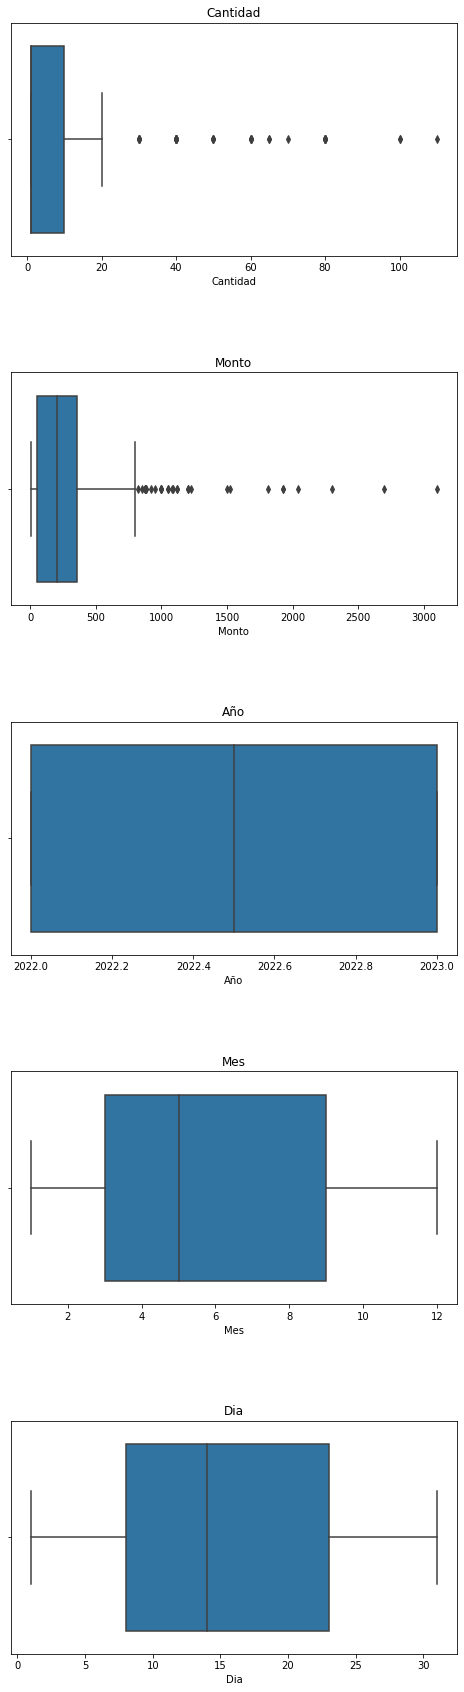

In [319]:
# Generar gráficas de las columnas numéricas de forma individual para para observar si hay valores negativos o inexistentes
#plt.title("Creemos gráficas tipo boxplot de las columnas numéricas:")
cols_num=datos[["Cantidad",'Monto','Año','Mes','Dia']]

fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=datos, ax=ax[i])
    ax[i].set_title(col)

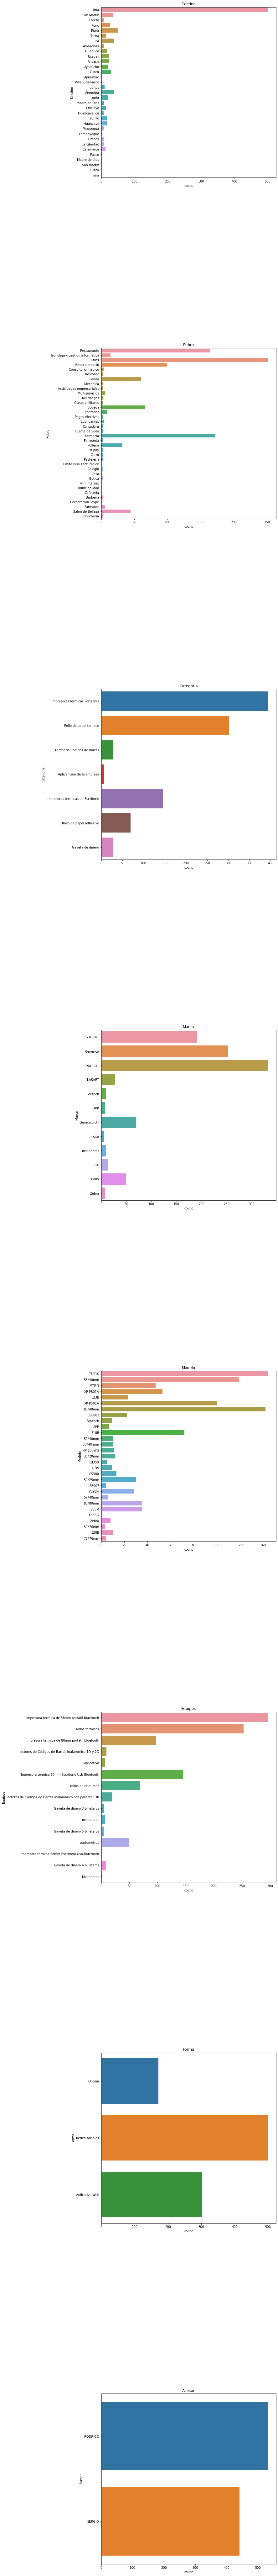

In [320]:
# Graficar los subniveles de cada variable categórica
cols_cat = ["Destino","Rubro","Categoria","Marca","Modelo","Equipos","Forma","Asesor"]

fig, ax = plt.subplots(nrows=8, ncols=1, figsize=(10,150))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
    sns.countplot(y=col,data=datos,ax=ax[i])
    ax[i].set_title(col)
 # ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)

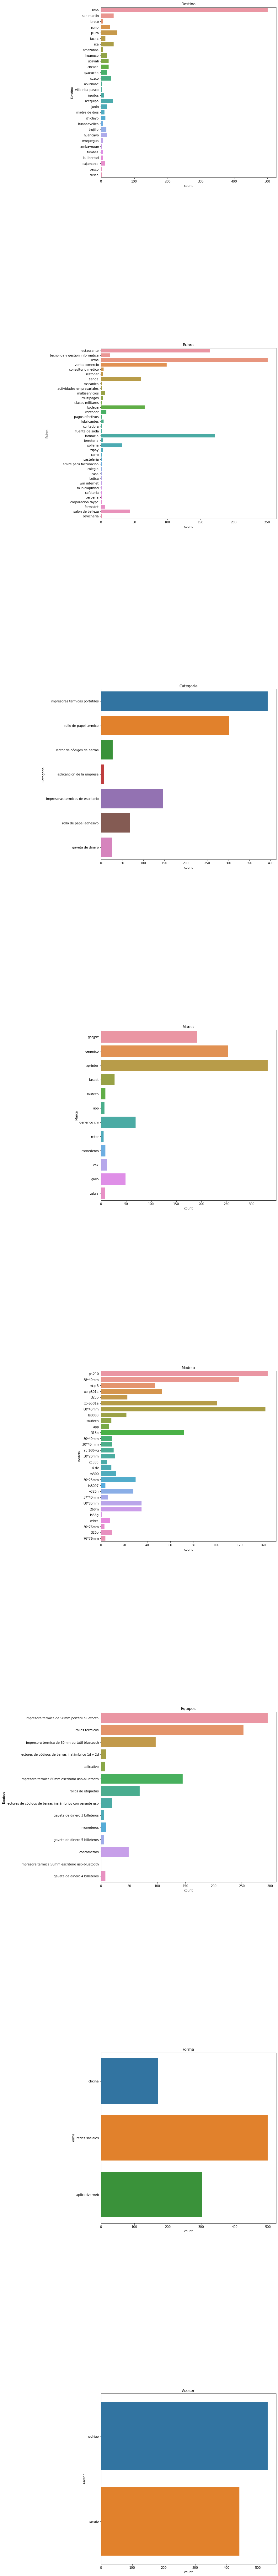

In [321]:
for column in datos.columns:
    # Representar en minúsculas sólo si la columna es categórica
    if column in cols_cat:
        datos[column] = datos[column].str.lower()

# Y generemos las gráficas nuevamente
fig, ax = plt.subplots(nrows=8, ncols=1, figsize=(10,150))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(y=col, data=datos, ax=ax[i])
  ax[i].set_title(col)
  #ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=0,)

In [322]:
# Destino: unificar villa rica-pasco. y pasco
print(datos['Destino'].unique())
datos['Destino'] = datos['Destino'].str.replace('villa rica-pasco','pasco', regex=False)
print(datos['Destino'].unique())

['lima' 'san martin' 'loreto' 'puno' 'piura' 'tacna' 'ica' 'amazonas'
 'huanuco' 'ucayali' 'ancash' 'ayacucho' 'cuzco' 'apurimac'
 'villa rica-pasco' 'iquitos' 'arequipa' 'junin' 'madre de dios'
 'chiclayo' 'huancavelica' 'trujillo' 'huancayo' 'moquegua' 'lambayeque'
 'tumbes' 'la libertad' 'cajamarca' 'pasco' 'cusco']
['lima' 'san martin' 'loreto' 'puno' 'piura' 'tacna' 'ica' 'amazonas'
 'huanuco' 'ucayali' 'ancash' 'ayacucho' 'cuzco' 'apurimac' 'pasco'
 'iquitos' 'arequipa' 'junin' 'madre de dios' 'chiclayo' 'huancavelica'
 'trujillo' 'huancayo' 'moquegua' 'lambayeque' 'tumbes' 'la libertad'
 'cajamarca' 'cusco']


In [444]:
##. cargar el excel de la hoja clientes 

precio_vent=pd.read_excel("Info RMV data medelado .xlsx", sheet_name="clientes")
precio_vent=precio_vent[["Nombre y Apellidos","Monto","Fecha de Compra","Costo Venta","Utilidad","Porcentaje de utilidad"]]
precio_vent=precio_vent[:574]
precio_vent['Costo Venta'] =pd.to_numeric(precio_vent['Costo Venta'],errors = 'coerce')
#desconpocicion
precio_vent["Año"]=precio_vent["Fecha de Compra"].dt.year
precio_vent["Mes"]=precio_vent["Fecha de Compra"].dt.month_name()
precio_vent["Dia"]=precio_vent["Fecha de Compra"].dt.day
precio_vent=precio_vent[["Nombre y Apellidos","Año","Mes","Dia","Monto","Costo Venta","Utilidad","Porcentaje de utilidad"]]
precio_vent


,Nombre y Apellidos,Año,Mes,Dia,Monto,Costo Venta,Utilidad,Porcentaje de utilidad
0,Yamira Santillana,2022,April,23,200.00,125.0,75.00,60.000000
1,Jhonathan Brain Tech,2022,April,28,190.00,160.0,30.00,18.750000
2,Juan Carlos,2022,May,1,200.00,125.0,75.00,60.000000
3,Jose,2022,May,1,200.00,125.0,75.00,60.000000
4,Carlos Jimenez,2022,May,12,600.00,330.0,270.00,81.818182
...,...,...,...,...,...,...,...,...
569,ATW SUPPORT AND SERVICES S.A.C.,2023,May,31,1815.00,1210.0,605.00,50.000000
570,Junior Rafael Mora Leon,2023,May,31,390.00,257.5,132.50,51.456311
571,Erica Gricelda Meca Rios,2023,May,31,199.99,122.0,77.99,63.926230
572,Juan Neil Velasque Bendezú,2023,May,31,510.00,336.0,174.00,51.785714


In [445]:
# exploracion de datos
#vision generaL del dataset
datos.columns

Index(['Codigo', 'Nombre y Apellidos', 'Destino', 'Rubro', 'Cantidad',
       'Categoria', 'Marca', 'Modelo', 'Equipos', 'Forma', 'Asesor', 'Pago',
       'Monto', 'Año', 'Mes', 'Dia'],
      dtype='object')

In [448]:
datos.dtypes

Codigo                  int64
Nombre y Apellidos     object
Destino                object
Rubro                  object
Cantidad                int64
Categoria              object
Marca                  object
Modelo                 object
Equipos                object
Forma                  object
Asesor                 object
Pago                   object
Monto                 float64
Año                     int64
Mes                     int64
Dia                     int64
dtype: object

In [326]:
datos.describe()

,Codigo,Cantidad,Monto,Año,Mes,Dia
count,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000
mean,486.512346,6.856996,252.917212,2022.500000,6.067901,15.164609
std,280.757682,13.002064,276.800892,0.500257,3.243867,8.642080
min,1.000000,1.000000,5.000000,2022.000000,1.000000,1.000000
25%,243.750000,1.000000,50.000000,2022.000000,3.000000,8.000000
50%,486.500000,1.000000,200.000000,2022.500000,5.000000,14.000000
75%,729.250000,10.000000,355.000000,2023.000000,9.000000,23.000000
max,973.000000,110.000000,3100.000000,2023.000000,12.000000,31.000000


In [327]:
#analisis unidimensional de las variables
datos["Destino"].value_counts()

lima             501
piura             49
ica               38
san martin        38
arequipa          37
cuzco             30
puno              27
ucayali           23
ancash            23
ayacucho          19
junin             19
huanuco           18
huancayo          17
trujillo          16
tacna             14
chiclayo          14
cajamarca         13
madre de dios     11
iquitos           10
loreto             7
huancavelica       7
amazonas           7
tumbes             7
moquegua           7
la libertad        7
pasco              5
lambayeque         3
apurimac           3
cusco              2
Name: Destino, dtype: int64

In [328]:
#datos.plot( y="Destino", x={datos["Destino"].value_counts()})

#datos.loc[:]

In [329]:
#x = datos.groupby("Destino")["Destino"].count()
datos["Categoria"].value_counts()


impresoras termicas portatiles       393
rollo de papel termico               302
impresoras termicas de escritorio    146
rollo de papel adhesivo               69
lector de códigos de barras           28
gaveta de dinero                      27
aplicancion de la empresa              7
Name: Categoria, dtype: int64

In [330]:

#datos.groupby("Modelo")["Modelo"].size().reset_index(name='counts')

<Axes: >

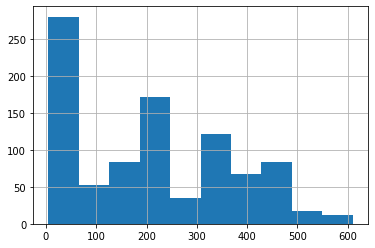

In [331]:
#datos.groupby("cantidad")["Cantidad"].wdtransform('sum')
datos[datos["Monto"]< datos["Monto"].quantile(0.95)]["Monto"].hist()

In [332]:
datos[datos["Monto"]< datos["Monto"].quantile(0.95)].head()

,Codigo,Nombre y Apellidos,Destino,Rubro,Cantidad,Categoria,Marca,Modelo,Equipos,Forma,Asesor,Pago,Monto,Año,Mes,Dia
0,1,Yamira Santillana,lima,restaurante,1,impresoras termicas portatiles,goojprt,pt-210,impresora termica de 58mm portátil bluetooth,oficina,rodrigo,BCP,200.0,2022,4,23
1,2,Jhonathan Brain Tech,lima,tecnoliga y gestion informatica,1,impresoras termicas portatiles,goojprt,pt-210,impresora termica de 58mm portátil bluetooth,oficina,rodrigo,BCP,190.0,2022,4,28
2,3,Juan Carlos,lima,restaurante,1,impresoras termicas portatiles,goojprt,pt-210,impresora termica de 58mm portátil bluetooth,oficina,sergio,EFECTIVO,200.0,2022,5,1
3,4,Jose,lima,tecnoliga y gestion informatica,1,impresoras termicas portatiles,goojprt,pt-210,impresora termica de 58mm portátil bluetooth,redes sociales,sergio,EFECTIVO,200.0,2022,5,1
4,5,Carlos Jimenez,lima,otros,3,impresoras termicas portatiles,goojprt,pt-210,impresora termica de 58mm portátil bluetooth,oficina,sergio,BCP,600.0,2022,5,12


<Axes: >

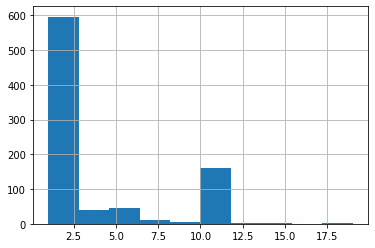

In [333]:
datos[datos["Cantidad"]< datos["Cantidad"].quantile(0.95)]["Cantidad"].hist()

<Axes: xlabel='Marca'>

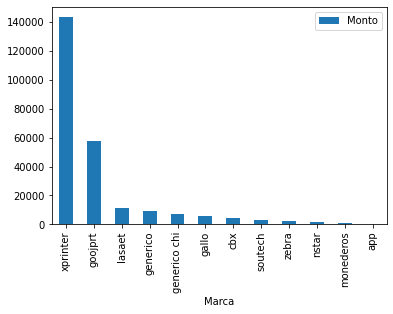

In [334]:
sum_monto_marca= datos.groupby("Marca").sum()["Monto"]
sum_monto_marca.reset_index().sort_values(by="Monto", ascending=False).iloc[0:20].plot(kind="bar", x="Marca" , y ="Monto")

In [335]:
sum_monto_marca

Marca
app                 70.00
cbx               4264.98
gallo             5910.00
generico          9343.28
generico chi      6915.00
goojprt          57756.87
lasaet           11325.00
monederos          770.00
nstar             1630.00
soutech           2715.00
xprinter        143005.40
zebra             2130.00
Name: Monto, dtype: float64

<Axes: xlabel='Modelo'>

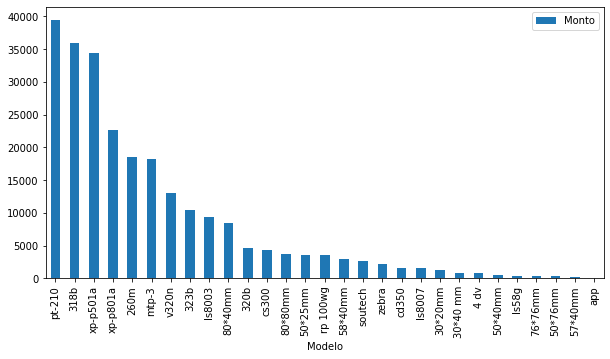

In [336]:
sum_monto_modelo= datos.groupby("Modelo").sum()["Monto"]

sum_monto_modelo.reset_index().sort_values(by="Monto", ascending=False).iloc[0:30].plot(kind="bar", x="Modelo" , y ="Monto",
             figsize=(10,5))

In [337]:
sum_monto_modelo

Modelo
260m        18505.00
30*20mm      1290.00
30*40 mm      855.00
318b        35962.99
320b         4630.00
323b        10394.99
4 dv          770.00
50*25mm      3595.00
50*40mm       480.00
50*76mm       320.00
57*40mm       165.00
58*40mm      2908.28
76*76mm       375.00
80*40mm      8440.00
80*80mm      3740.00
app            70.00
cd350        1630.00
cs300        4264.98
ls58g         400.00
ls8003       9345.00
ls8007       1580.00
mtp-3       18244.88
pt-210      39511.99
rp 100wg     3525.00
soutech      2715.00
v320n       12992.00
xp-p501a    34340.42
xp-p801a    22655.00
zebra        2130.00
Name: Monto, dtype: float64

array([<Axes: title={'center': 'Monto'}, xlabel='Mes'>], dtype=object)

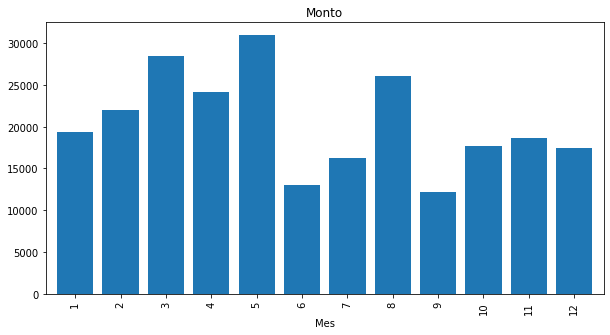

In [338]:
sum_monto_mes= datos.groupby("Mes").sum()["Monto"]
sum_monto_mes.plot(kind = 'bar',
             width=0.8,
             subplots=True,
             figsize=(10,5))
#sum_monto_mes.reset_index().sort_values(by="Monto", ascending=False).iloc[1:40].plot(kind="bar", x="Mes" , y ="Monto")

<Axes: xlabel='Destino'>

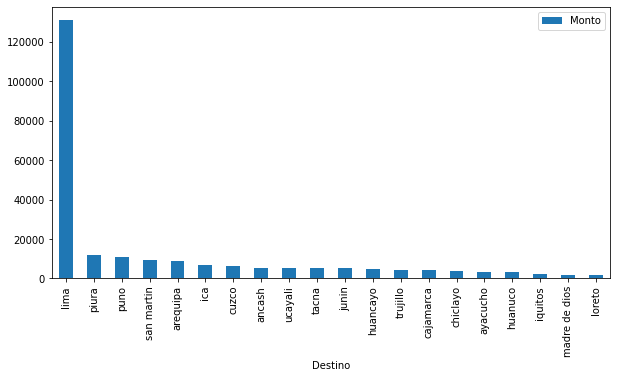

In [339]:
sum_monto_des= datos.groupby("Destino").sum()["Monto"]
sum_monto_des.reset_index().sort_values(by="Monto", ascending=False).iloc[0:20].plot(kind="bar", x="Destino" , y ="Monto",
             figsize=(10,5))

In [340]:
sum_monto_des

Destino
amazonas           1511.00
ancash             5409.98
apurimac            700.00
arequipa           8905.92
ayacucho           3333.00
cajamarca          4160.00
chiclayo           4005.50
cusco               200.00
cuzco              6212.00
huancavelica       1230.00
huancayo           4549.99
huanuco            3062.90
ica                6744.99
iquitos            2028.00
junin              5154.99
la libertad        1525.00
lambayeque          870.00
lima             131296.96
loreto             1598.00
madre de dios      1884.30
moquegua           1455.00
pasco              1255.00
piura             12080.00
puno              11075.00
san martin         9334.00
tacna              5205.00
trujillo           4380.00
tumbes             1319.00
ucayali            5350.00
Name: Monto, dtype: float64

<Axes: xlabel='Asesor'>

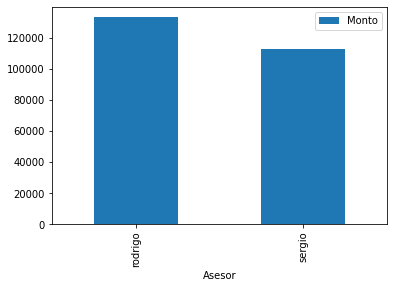

In [476]:
sum_monto_asesor= datos.groupby("Asesor").sum()["Monto"]
sum_monto_asesor.reset_index().sort_values(by="Monto", ascending=False).iloc[0:20].plot(kind="bar", x="Asesor" , y ="Monto")

In [477]:
sum_monto_asesor

Asesor
rodrigo    133149.54
sergio     112685.99
Name: Monto, dtype: float64

C:\Users\51936\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Cantidad', ylabel='Monto'>

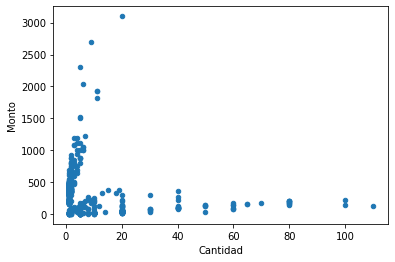

In [341]:
datos.plot.scatter(y ="Monto",x ="Cantidad")
#cols_num.plot.scatter(x="Mes",y="Cantidad")

<Axes: xlabel='Año'>

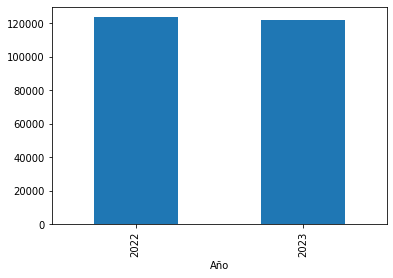

In [389]:
sum_monto_año= datos.groupby("Año").sum()["Monto"]
sum_monto_año.plot.bar()
#sum_monto_año.reset_index().sort_values(by="Monto", ascending=False).iloc[1:50].plot(kind="bar", x="Año" , y ="Monto")


Text(0.5, 1.0, 'Porcentaje de ventas realizadas')

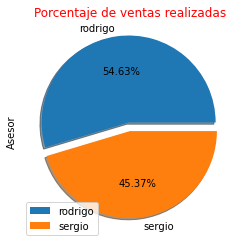

In [494]:
#
destpro =datos.Asesor.value_counts()
destpro.plot.pie(autopct="%1.2f%%",
                 shadow=True,
                 explode=[0.10,0])
plt.legend()
plt.title("Porcentaje de ventas realizadas",color="red")

<Axes: >

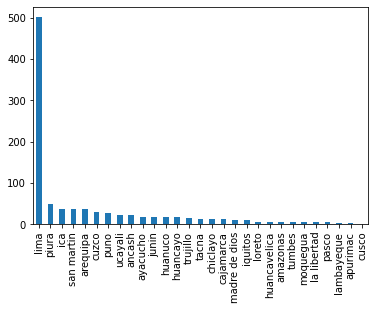

In [473]:
destbar=datos.Destino.value_counts()
destbar.plot.bar()

In [345]:
#datos.Destino.plot.hist()

Text(0.5, 1.0, 'Formas de pago')

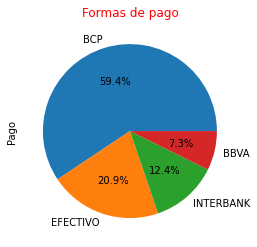

In [501]:
destpago =datos.Pago.value_counts()
destpago.plot.pie(autopct="%1.1f%%")
plt.title('Formas de pago',color="red")

Text(0, 0.5, 'PRODUCTOS')

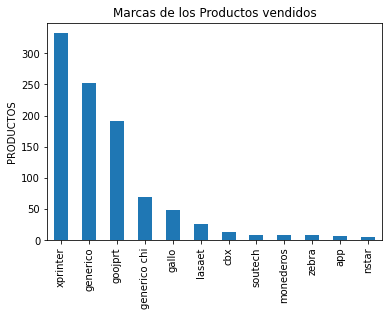

In [347]:
MARCbar=datos.Marca.value_counts()
MARCbar.plot.bar()
plt.title('Marcas de los Productos vendidos')
plt.ylabel('PRODUCTOS')

In [348]:
pd.crosstab( datos['Marca'], columns='count')

col_0,count
Marca,
app,7
cbx,13
gallo,49
generico,253
generico chi,69
goojprt,191
lasaet,27
monederos,9
nstar,5


In [349]:
mod_cont=datos.groupby("Modelo")["Modelo"].size().reset_index(name='counts')
mod_cont_c=mod_cont[["counts"]]
#mod_cont_c


<Axes: title={'center': 'Monto'}, xlabel='[Categoria]'>

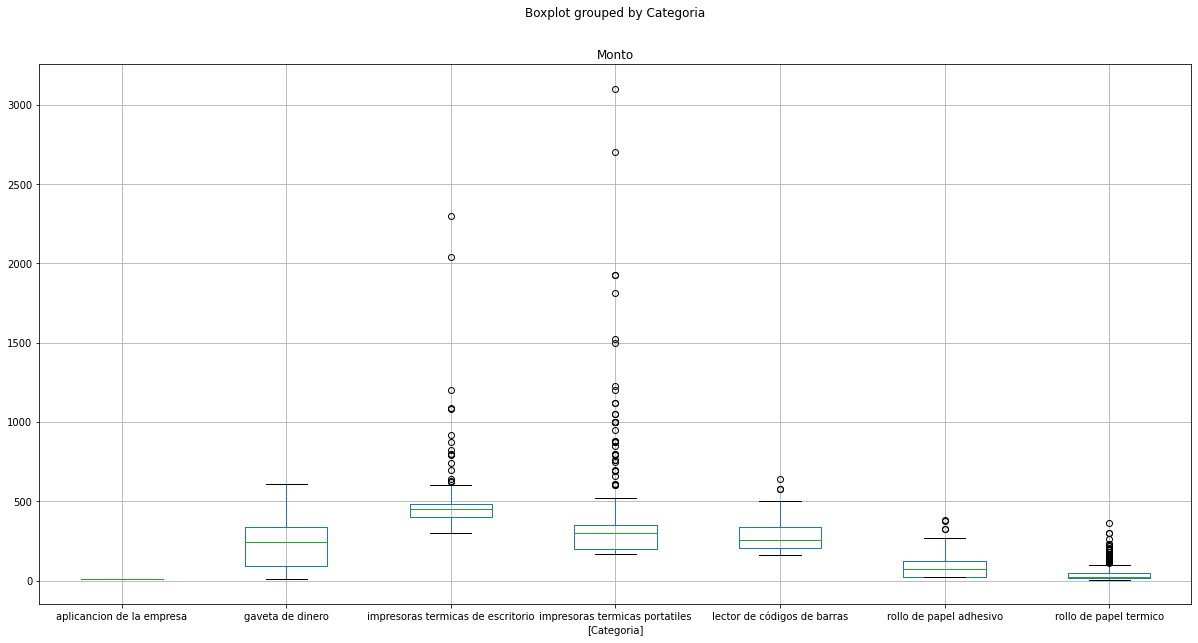

In [350]:

datos.boxplot(column=['Monto'], by=['Categoria'], figsize=(20,10))

<Axes: >

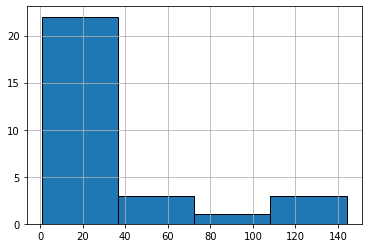

In [472]:
mod_cont['counts'].hist(bins=4,edgecolor="black",)

<Axes: xlabel='Utilidad', ylabel='Costo Venta'>

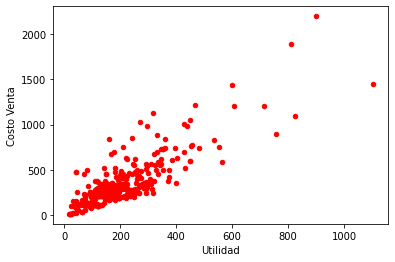

In [386]:
#plt.scatter(y=precio_vent.Costo Venta,x=precio_vent.Utilidad)
precio_vent.plot.scatter(y ="Costo Venta",x ="Utilidad",alpha=1,color="red")

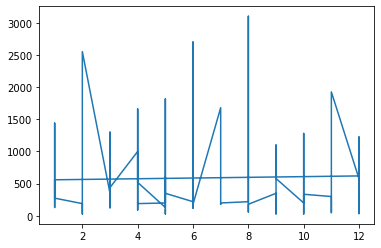

In [392]:
sum_monto_mes2= precio_vent.groupby("Mes").sum()["Monto"]
sum_monto_mes3= precio_vent.groupby("Mes").sum()["Costo Venta"]
plt.plot(precio_vent.Mes,precio_vent.Monto)
#plt.plot(sum_monto_mes3,precio_vent.Mes,linestyle="--")
#fig, ax = plt.subplots(figsize=(10,5))
#precio_vent.plot.area(ax=ax)

In [373]:
precio_vent.dtypes

Nombre y Apellidos         object
Año                         int64
Mes                         int64
Dia                         int64
Monto                     float64
Costo Venta               float64
Utilidad                  float64
Porcentaje de utilidad    float64
dtype: object

In [ ]:
#cols_num.plot.box()
datos.Monto

Text(0.5, 1.0, 'Ventas por mes')

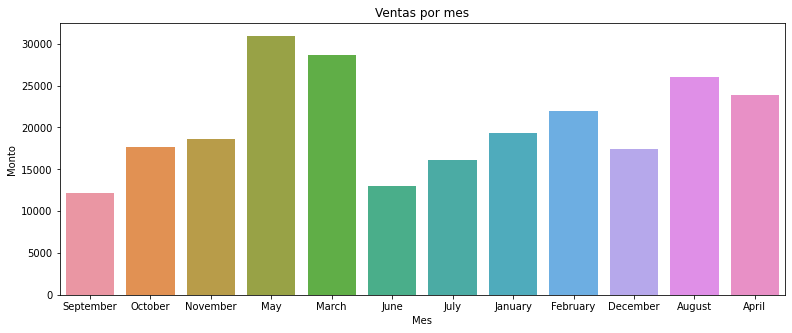

In [478]:
df_Mes=precio_vent.groupby('Mes').sum()
df_Mes=df_Mes.reset_index()
#grafica de lineas
df_Mes=df_Mes.sort_values('Mes',ascending=False)
fig, ax = plt.subplots(figsize=(13,5))
fig.subplots_adjust(hspace=1)

sns.barplot(x = "Mes", y = "Monto", data = df_Mes,ax=ax)

plt.title('Ventas por mes')

In [479]:
df_Mes


,Mes,Año,Dia,Monto,Costo Venta,Utilidad,Porcentaje de utilidad
11,September,62682,500,12140.00,8245.00,3895.00,1702.200386
10,October,109188,881,17706.00,12248.00,5458.00,3078.745075
9,November,80880,636,18605.00,11647.00,6958.00,2564.928785
8,May,165878,1292,30945.16,18734.30,12210.86,5781.768449
7,March,133518,1131,28651.00,16926.76,11724.24,4900.495298
6,June,60660,297,12989.00,8602.00,4387.00,1776.926795
5,July,86946,643,16140.92,10928.00,5212.92,2320.258371
4,January,72828,589,19339.00,11793.40,7545.60,2465.153107
3,February,99127,715,21977.00,13312.00,8665.00,3375.764191
2,December,78858,584,17415.00,10084.20,7330.80,3175.244858


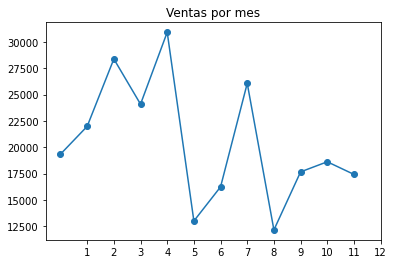

In [452]:
df_Mes=precio_vent.groupby('Mes').sum()
df_Mes=df_Mes.reset_index()
#grafica de lineas
plt.plot(df_Mes['Monto'], marker='o')
plt.xticks(df_Mes['Mes'])
plt.title('Ventas por mes')
plt.ticklabel_format(axis='x', style='sci')

plt.show()

In [483]:

fig, ax = plt.subplots(figsize=(10,5))
fig.subplots_adjust(hspace=1)

sns.countplot(x="Mes",y="Monto" data=datos, ax=ax)
ax.set_title("ventas por mes")

SyntaxError: invalid syntax (2319422167.py, line 4)

<Axes: >

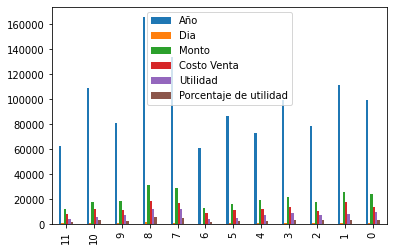

In [485]:
df_Mes.plot(kind = 'bar')